In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

In [3]:
hr = pd.read_csv('D:/Datasets/HRAnalytics.csv')

## Improving model's performance
    - Feature Selection - drop columns
        - Correlation,Chi-Square,Anova -> ( mostly used for regression)
        - Here in classification we can use it to knock off columns
    - Feature Extraction - transform data from one domain to another
        - PCA
    - Feature Engineering - creative process
        - Create new columns,transform individual numeric columns (to log values,sqrt,..) 
    - HyperParameter Tuning

In [8]:
credit = pd.read_csv('D:/Datasets/credit-default.csv')
credit.head(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [9]:
credit['default'].value_counts()

1    700
2    300
Name: default, dtype: int64

In [10]:
#To check if ther is missing values
pd.isnull(credit).sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
telephone               0
foreign_worker          0
job                     0
dtype: int64

In [11]:
# Target column if is numerical no need to remove it while creating dummy vairable
credit_dummies = pd.get_dummies(credit)
credit_dummies.shape

(1000, 62)

## PCA

In [37]:
# draw ellipse
el = pd.read_csv('D:/Datasets/ellipse.csv')
el.head(5)

,x,y
0,3.500000,4.500000
1,3.482555,4.509875
2,3.464861,4.519499
3,3.446921,4.528871
4,3.428737,4.537990


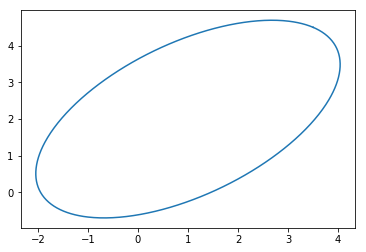

In [16]:
# To draw ellipse in python
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(el['x'],el['y'])

In [36]:
# Need to convert this to a square matrix for finding eigen values and eigen vectors
# so build a correlation matrix to make it as Square matrix
el.corr()

,x,y
x,1.000000,0.552432
y,0.552432,1.000000


In [20]:
# Eigen value and Eigen vector
from numpy.linalg import eig
evalue,evector = eig(el.corr())

In [21]:
evalue

array([1.552432, 0.447568])

In [22]:
evector

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [23]:
from sklearn.decomposition import PCA
pc_class = PCA()
# multiply the input data with eigen vectors.
pcs = pd.DataFrame(pc_class.fit_transform(el),columns = ['PC1', 'PC2'])
pcs.head()

,PC1,PC2
0,-3.510896,-0.382795
1,-3.503481,-0.401419
2,-3.495715,-0.420003
3,-3.487598,-0.438545
4,-3.479133,-0.457043


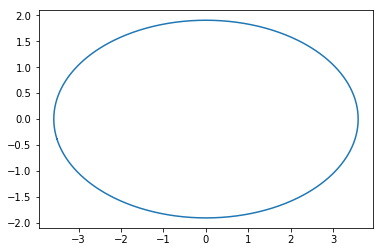

In [24]:
plt.plot(pcs['PC1'],pcs['PC2'])
# PC1 and PC2 are combination of x and y seperately

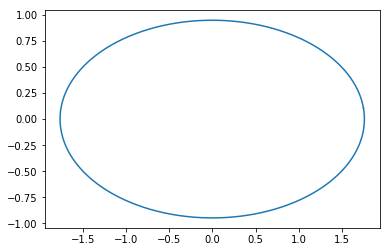

In [48]:
#Standardize the ellipse data , pca manually
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ellipse_scaled = scaler.fit_transform(el)

pcs = pd.DataFrame(np.dot(ellipse_scaled,evector),columns = ['PC1', 'PC2'])
pcs.head()
plt.plot(pcs['PC1'],pcs['PC2'])

In [40]:
# What happens when reducing the dimensions take pc1 or pc2 , make pc2 as 0
pcs_reduced = pcs
pcs_reduced['PC1'] = 0
pcs_reduced.head()

,PC1,PC2
0,0,0.106163
1,0,0.115564
2,0,0.124953
3,0,0.134330
4,0,0.143694


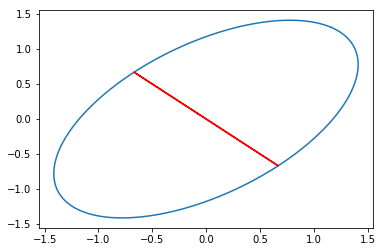

In [43]:
#Doing Inverse Transfrom , multiply pc with Eigen vectors [ 629 * 2 and 2 * 2 ] to get [629 * 2] which is the input datapcs,

ellipse_recon = np.dot(pcs_reduced,np.matrix.transpose(evector))
ellipse_recon = pd.DataFrame(ellipse_recon,columns = el.columns)

df_ellipse_scaled = pd.DataFrame(ellipse_scaled,columns = ['x','y'])
plt.plot(df_ellipse_scaled['x'],df_ellipse_scaled['y'])
plt.plot(ellipse_recon['x'],ellipse_recon['y'],color = 'Red')
# THis is with PC1 as 0 , opposite of PC2 = 0

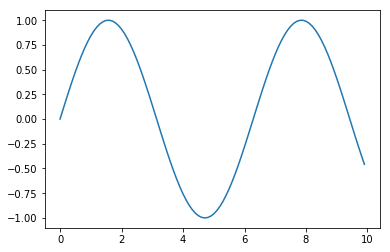

In [46]:
# Sin graph
time = np.arange(0,10,0.1)
amplitude = np.sin(time)
plt.plot(time,amplitude)

### Dimension Reduction

In [49]:
pcs.corr()

,PC1,PC2
PC1,1.000000e+00,5.648436e-17
PC2,5.648436e-17,1.000000e+00


##  Correlation - only linear dependency is explained.
###  If 2 data points are not correlated , there might be a non linear relationship between them.
### if 2 data points are said to be independent , there is no linear or non linear relationship between each other
### Here PC's are Uncorrelated to each other.PC's are orthogonal to each other(ppr to each other)
###  If an algorithm expects un correlated data we can make the data into principal components and feed the model       with PC's.so that  the effeciency will improve.

## Applications
### Objective is to have features(Input columns) with 0 correlation
### Input->PC's->Reduced PC's(choose only first some PC's)->Algorithm
### PCA can be used for Naive Bayes (no dependency between 2 var's) .
### linear reg . cannot take many columns. each and every column will have Std.Error and thats not preferred
### so pca can be applied and input the model only 5 columns

#### Noise Reduction

 PCA for ML

In [50]:
train,test = train_test_split(credit_dummies,test_size = 0.3,random_state = 100)
train_x = train.drop('default',axis  = 1)
test_x = test.drop('default',axis  = 1)

train_y= train['default']
test_y = test['default']

In [58]:
# Model with raw input :
ml = RandomForestClassifier(random_state = 100)
ml.fit(train_x,train_y)
test_pred1 = ml.predict(test_x)

from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(test_y,test_pred1,))
print(classification_report(test_y,test_pred1))

0.76
             precision    recall  f1-score   support

          1       0.79      0.91      0.85       219
          2       0.60      0.35      0.44        81

avg / total       0.74      0.76      0.74       300



In [59]:
# model with Principal component.
m2 = RandomForestClassifier(random_state = 100)

scaler = StandardScaler() # scaling
scaler.fit(train_x) # fit the scaler with train data

train_x_scaled = scaler.transform(train_x) # Trasnform the train data
test_x_scaled  = scaler.transform(test_x) # Transform the test data

pc_transformer = PCA()               
pc_transformer.fit(train_x_scaled)             # Fit the train data for the PCA class
pcs_train = pc_transformer.transform(train_x_scaled) # using the found eigen val and vectors transform the data.
pcs_test = pc_transformer.transform(test_x_scaled)

# Use same eigen val and vec for both train and test data

## Fit the model m2
m2.fit(pcs_train,train_y)
test_pred2 = m2.predict(pcs_test)

print(accuracy_score(test_y,test_pred2))
print(classification_report(test_y,test_pred2))

0.74
             precision    recall  f1-score   support

          1       0.77      0.91      0.84       219
          2       0.54      0.27      0.36        81

avg / total       0.71      0.74      0.71       300



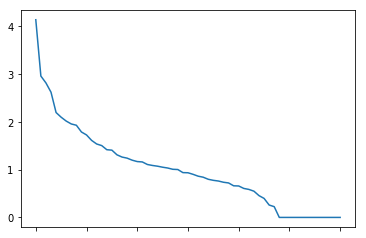

In [72]:
## Reduce the pcs and try fitting the model

m3 = RandomForestClassifier(random_state=100)
#cols = ['PC' + str(i)  for i in range(1,pcs_train.shape[1]+1)]
cols = ['PC%d' % i for i in range(1,pcs_train.shape[1]+1)] # %d is replaced by i , string concatenation

df_pcs_train = pd.DataFrame(pcs_train,columns=cols)
df_pcs_test = pd.DataFrame(pcs_test,columns = cols)
df_pcs_train.var().plot.line()


In [63]:
#variance of the principal components ,variance of  sorted eigen values are the same.
#evalues,evectors = np.linalg.eig(pd.DataFrame(train_x_scaled).corr())
#plt.plot(sorted(evalues)[::-1])

In [69]:
# What(How many) PC's to retain
plt.plot(sorted(evalues/len(evalues)*100)[::-1])  # also -> plt.plot(sorted(evalues/sum(evalues)*100)[::-1])
np.cumsum(sorted(evalues/len(evalues)*100)[::-1])

# if 1 PC is retained and rest is 0 , only 6 % of the data is alone retained , PC1 and 2 together hold 11 % and so on....

# We have to decide how many PC's are required to have the 95 % of the data

cum_vars = np.cumsum(sorted(evalues/len(evalues)*100)[::-1])
(cum_vars < 95).sum()

41

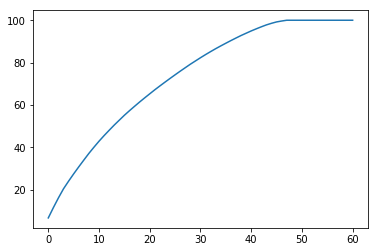

In [70]:
#scree plot
plt.plot(cum_vars)
# Visual method : check how many PC's are required for 95%

In [73]:
#Building model with 41 pc's
#df_pcs = df_pcs_train
m3 = RandomForestClassifier(random_state=100)
m3.fit(df_pcs_train.iloc[:,:41],train_y)
test_pred3 = m3.predict(df_pcs_test.iloc[:,:41])

print(accuracy_score(test_y,test_pred3))
print(classification_report(test_y,test_pred3))

## Using PC's is reducing the accuracy of the RF model for this data.

0.7233333333333334
             precision    recall  f1-score   support

          1       0.76      0.90      0.83       219
          2       0.48      0.25      0.33        81

avg / total       0.69      0.72      0.69       300

